<a href="https://colab.research.google.com/github/Sarankumar7979/House-pricing/blob/main/HPmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
import pandas as pd

df = pd.read_csv("AmesHousing.csv")
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [13]:


# Display first few rows of the dataset to understand its structure
print(df.head())

# 3. Initial Data Cleaning
# Drop rows with missing target values ("SalePrice")
df.dropna(axis=0, subset=["SalePrice"], inplace=True)

# Select only numerical features for regression (drop categorical features for now)
df = df.select_dtypes(include=[np.number])

# Fill remaining missing values with median (for numerical columns)
df = df.fillna(df.median())

# 4. Define Features and Target
# Features: All columns except 'SalePrice'
X = df.drop("SalePrice", axis=1)

# Target: 'SalePrice' is the target variable
y = df["SalePrice"]

# 5. Train-Test Split
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0      1  526301100           20         141.0     31770             6   
1      2  526350040           20          80.0     11622             5   
2      3  526351010           20          81.0     14267             6   
3      4  526353030           20          93.0     11160             7   
4      5  527105010           60          74.0     13830             5   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  Wood Deck SF  \
0             5        1960            1960         112.0  ...           210   
1             6        1961            1961           0.0  ...           140   
2             6        1958            1958         108.0  ...           393   
3             5        1968            1968           0.0  ...             0   
4             5        1997            1998           0.0  ...           212   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0

Normalize Features

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initialize and Train Model

In [17]:
model = LinearRegression()


Train the model on the training data

In [18]:
model.fit(X_train_scaled, y_train)

LinearRegression()

Predict and Evaluate the Model

In [20]:
y_pred = model.predict(X_test_scaled)

Calculate evaluation metrics: MAE, RMSE, R² Score

In [21]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

Print the evaluation results

In [22]:
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 21954.927200212747
Root Mean Squared Error: 36131.65596210685
R² Score: 0.8371700956683596


 Visualize Results

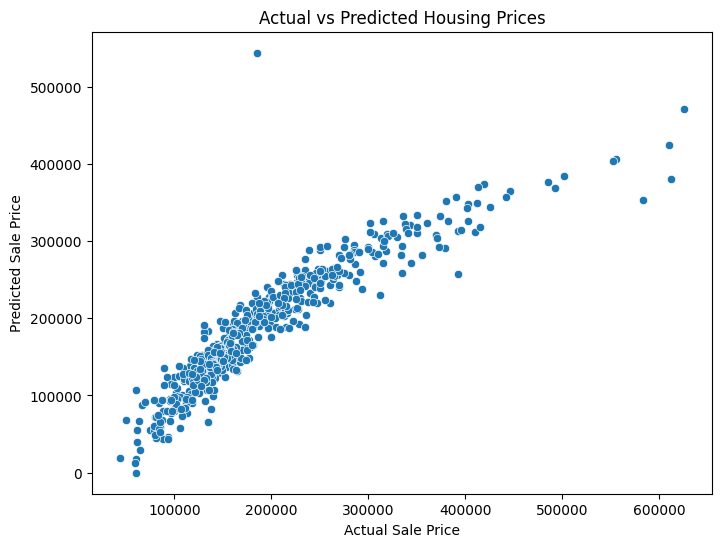

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Actual vs Predicted Housing Prices")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()